In [1]:
import os
import pandas as pd 
import numpy as np

import missingno as msno
import plotly.graph_objects as go
import utils, config
from scipy import stats

In [2]:
wh_df_2022 = pd.read_csv('data/2022.csv').iloc[:-1,1:]
wh_df_2021 = pd.read_csv('data/2021.csv')
wh_df_2020 = pd.read_csv('data/2020.csv')

In [5]:
wh_df_2022.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [6]:
wh_df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [7]:
wh_df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [8]:
wh_df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country                                     146 non-null    object
 1   Happiness score                             146 non-null    object
 2   Whisker-high                                146 non-null    object
 3   Whisker-low                                 146 non-null    object
 4   Dystopia (1.83) + residual                  146 non-null    object
 5   Explained by: GDP per capita                146 non-null    object
 6   Explained by: Social support                146 non-null    object
 7   Explained by: Healthy life expectancy       146 non-null    object
 8   Explained by: Freedom to make life choices  146 non-null    object
 9   Explained by: Generosity                    146 non-null    object
 10  Explained by: Perceptions 

In [9]:
wh_df_2022.columns[1:]

Index(['Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [10]:
for column in wh_df_2022.columns[1:]:
    wh_df_2022[column] = wh_df_2022[column].str.replace(',', '.')
    wh_df_2022[column] = pd.to_numeric(wh_df_2022[column])

In [11]:
wh_df_2022['Country'] = wh_df_2022['Country'].str.rstrip('*')

In [12]:
wh_df_2022[['Country', 'Happiness score']].head(20)


,Country,Happiness score
0,Finland,7.821
1,Denmark,7.636
2,Iceland,7.557
3,Switzerland,7.512
4,Netherlands,7.415
5,Luxembourg,7.404
6,Sweden,7.384
7,Norway,7.365
8,Israel,7.364
9,New Zealand,7.200


#### Top 10 happiest countries

In [13]:
utils.plot_happiness_score(wh_df_2022,'Happiness score', 'Country', 10, 2022)

#### Least 10 happiest countries 

In [14]:
utils.plot_happiness_score(wh_df_2022.iloc[-10:,:],'Happiness score', 'Country', 10, 2022)

/Users/eugeneolkhovik/Desktop/master/reproducible_research/project/RR_world_happiness/utils/plot_utils.py:106: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



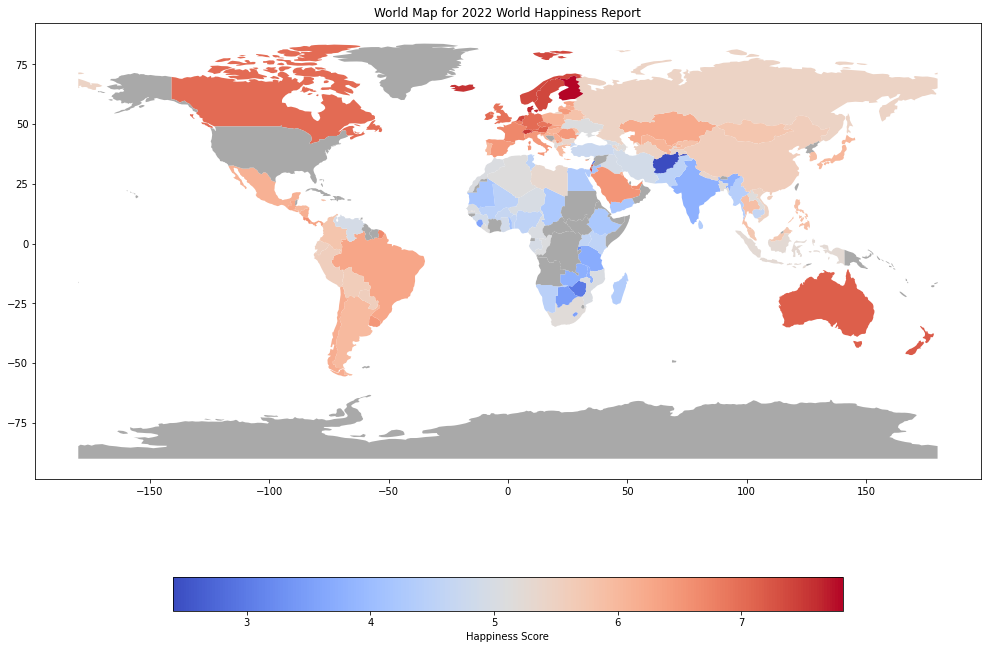

In [15]:
utils.plot_happiness_map(wh_df_2022, 'Happiness score', 'Country', 2022)

In [16]:
# explore Pirson correlation for linear dependecies between variables. 
# Since Whisker's columns related to Happiness score all of these three variable have correlation 1
# in Furhter analysis for linear models 2 of them should be eliminated
utils.build_correlation_matrix(wh_df_2022)

In [17]:
region_mapping = dict(zip(wh_df_2021['Country name'], wh_df_2021['Regional indicator']))

In [18]:
wh_df_2022['Region'] = wh_df_2022['Country'].map(region_mapping)

<AxesSubplot:>

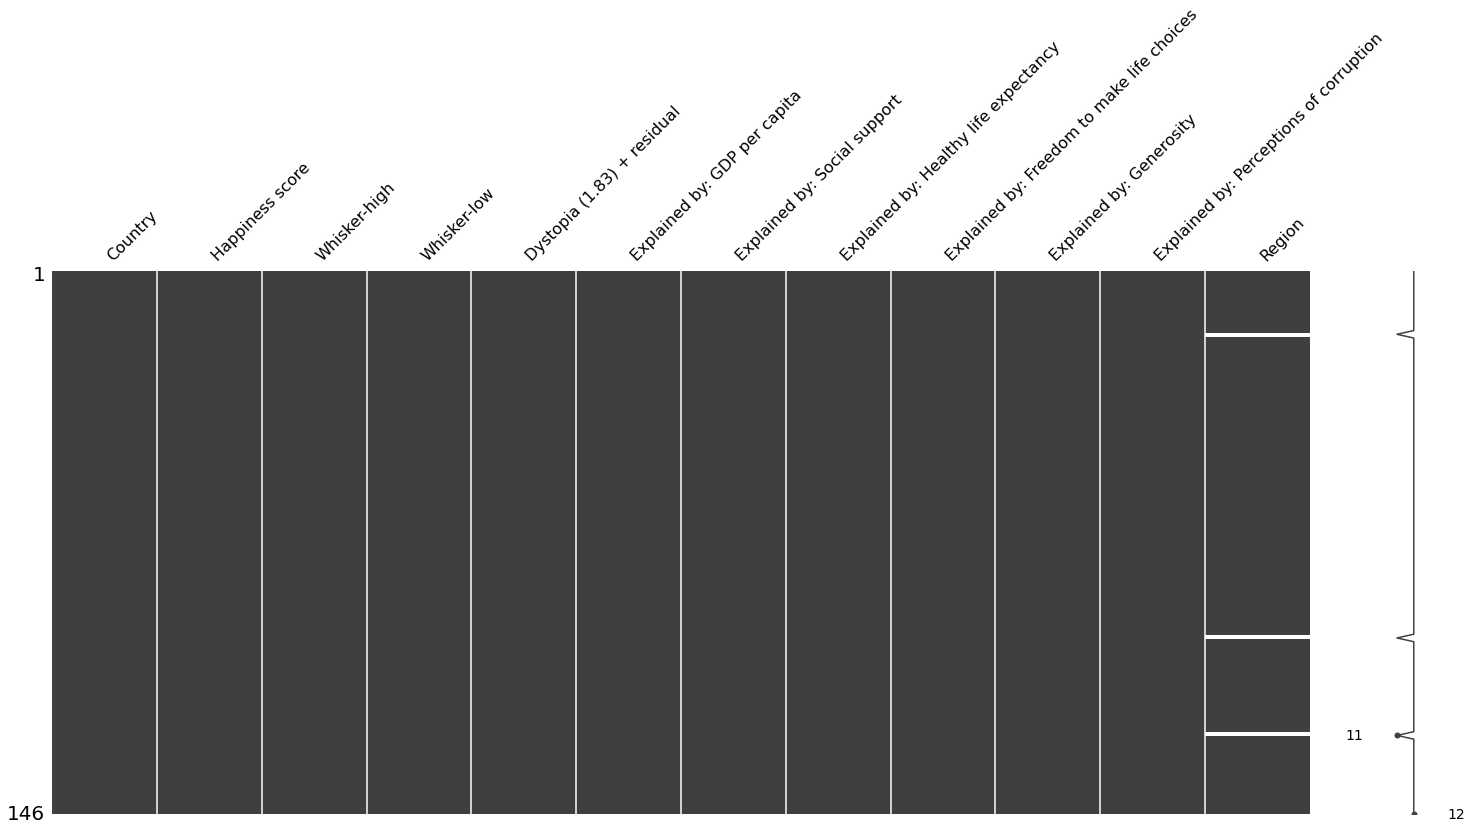

In [19]:
# there are 3 missing values in 3 Region
msno.matrix(wh_df_2022)

In [20]:
countries_without_region = wh_df_2022[wh_df_2022['Region'].isnull()]['Country']
countries_without_region

17                  Czechia
98                    Congo
124    Eswatini, Kingdom of
Name: Country, dtype: object

In [21]:
# Specify the incorrect and correct country names
corrections = {
    'Czechia': 'Czech Republic',
    'Congo': 'Congo (Brazzaville)'
}

# Replace the incorrect country names with the correct ones
wh_df_2022['Country'] = wh_df_2022['Country'].replace(corrections)


In [22]:
# Specify the country to drop
country_to_drop = 'Eswatini, Kingdom of'

# Drop the rows with the specified country
wh_df_2022 = wh_df_2022[wh_df_2022['Country'] != country_to_drop]

In [23]:
wh_df_2022['Region'] = wh_df_2022['Country'].map(region_mapping)

In [24]:
# Rename columns to be consistent with 2022 data
columns_mapping_dict = {
    'Country name': 'Country',
    'Regional indicator': 'Region',
    'Ladder score': 'Happiness score',
    'upperwhisker': 'Whisker-high',
    'lowerwhisker': 'Whisker-low',
    'Explained by: Log GDP per capita': 'Explained by: GDP per capita',
    'Dystopia + residual': 'Dystopia (1.83) + residual',
}

wh_df_2021.rename(columns=columns_mapping_dict, inplace=True)
wh_df_2020.rename(columns=columns_mapping_dict, inplace=True)

# We'll only keep the common columns for simplicity
common_columns = list(set(wh_df_2022.columns) & set(wh_df_2021.columns) & set(wh_df_2020.columns))

wh_df_2022 = wh_df_2022[common_columns]
wh_df_2021 = wh_df_2021[common_columns]
wh_df_2020 = wh_df_2020[common_columns]

# Add a year column to each dataframe to distinguish them after merging
wh_df_2022['Year'] = 2022
wh_df_2021['Year'] = 2021
wh_df_2020['Year'] = 2020

# Combine the data
combined_data = pd.concat([wh_df_2022, wh_df_2021, wh_df_2020])

# Sort the data by Country and Year
combined_data.sort_values(by=['Country', 'Year'], inplace=True)

# Reset index for the combined data
combined_data.reset_index(drop=True, inplace=True)

In [25]:
# Rename columns for better readability
combined_data.rename(columns=config.col_name_to_shorter_col_name, inplace=True)

In [26]:
# Create a new column in the data frame that specifies whether each country is in the Global North
combined_data['Global_North'] = combined_data['country'].apply(lambda x: 1 if x in config.north_countries else 0)


In [27]:
# Filter data for most recent year
recent_data = combined_data[combined_data['Year'] == 2022]

#Calculating the average happiness score for the Global North and Global South:
north_south_avg = recent_data.groupby('Global_North')['happiness_score'].mean()
print(north_south_avg)

Global_North
0    5.387032
1    6.652350
Name: happiness_score, dtype: float64


In [28]:
# Separate the happiness scores of the North and the South
north_scores = recent_data[recent_data['Global_North'] == 1]['happiness_score']
south_scores = recent_data[recent_data['Global_North'] == 0]['happiness_score']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(north_scores, south_scores, alternative='greater')
print(f"t = {t_stat}, p-value = {p_value}")

t = 5.266396466416511, p-value = 2.502231675409177e-07


#### Interpretation of the Result 
The t-statistic and the p-value result from a t-test, which is used to determine whether there is a significant difference between the means of two groups. In this case, you're testing the difference in happiness scores between countries in the Global North and the Global South.

The t-statistic (7.996) tells you how much the groups differ in terms of standard errors. A positive t-value suggests that the first group (Global North) has a higher mean happiness score than the second group (Global South).

The p-value (1.969e-13) is extremely small, far below the common significance level of 0.05 (or 5%). The p-value is the probability of observing a result as extreme as the one you got (or more so), assuming the null hypothesis is true. In this context, the null hypothesis is that there is no difference in the means of the happiness scores for the North and South groups.

Since your p-value is so small, you would reject the null hypothesis and conclude that there is a statistically significant difference in the happiness scores of the North and South countries, with the North having a higher average happiness score. It's important to remember that this is a statistical test and doesn't provide direct insights into the causes of this difference.